# Практическое задание № 2. Нейронные сети


**Работу выполнил (а):**

Овчинников Павел Алексеевич, 368606

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже. 


### Импорт библиотек
Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [2]:
train_data = pd.read_csv('data/notebook_files/train.csv')
test_data = pd.read_csv('data/notebook_files/test.csv')

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `missing_value_checker` для проверки и подсчёта пропущеных значений в `test_data`. А также выведем тип данных этих значений.


In [5]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print(f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))


missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:
- удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];
- заполним числовое отсутствующее значение значением `mean`;
- заполним строковое отсутствующее значение значением `missing`.

In [6]:
test_edited = test_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)


def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype('category').cat.as_ordered()
            data[label] = pd.Categorical(content).codes + 1


nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [7]:
missing_value_checker(test_edited)

[]
0


In [8]:
missing_value_checker(train_edited)

[]
0


In [9]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [10]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [11]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.csv на обучающие и проверочные данные, соотношение составляет 20%.

In [12]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [63]:
X_train.shape, X_val.shape, test_edited.shape

((1168, 75), (292, 75), (1459, 75))

## Моделирование

### Построение и обучение модели

Создадим последовательную модель нейронной сети с помощью фрэймворка Tensorflow, предназначенного для тренировки нейронных сетей.

In [134]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def get_model(
    in_: int,
    out: int,
    hidden: int = None,  # type: ignore
    activation: str = 'relu',
):
    model = keras.Sequential()
    model.add(layers.Dense(in_, activation=activation))
    if hidden is not None:
        model.add(layers.Dense(hidden, activation=activation))
    model.add(layers.Dense(out, activation='linear'))

    return model


model = get_model(150, 1)

Скомпилируем нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [135]:
model.compile(optimizer='adam', loss='msle')

Обучим модель на обучающих данных `X_train` и `y_train` задав гиперпараметры модели нейронной сети — количество эпох (epochs) и размер мини-выборки (batch_size).

In [136]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.0710
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0549
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5934
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5984
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4016
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6320
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0974
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7060
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4035
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1471
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9402
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7777
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6497
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5481
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4669
Epoch 16/20
37/37

**Оценим полученные результаты**

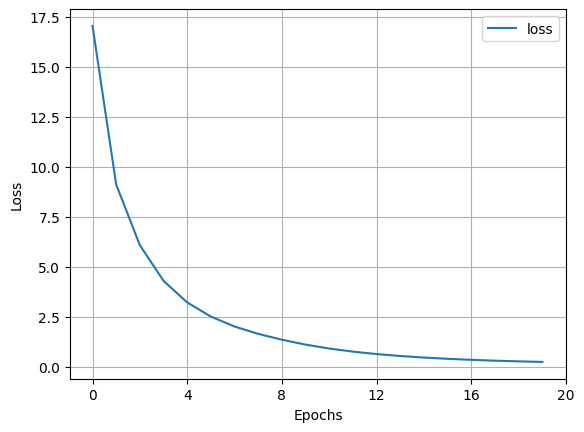

In [138]:
def render_loss_graph(history, epochs=20):
    pd.DataFrame(history.history).plot()
    plt.xlabel('Epochs')
    plt.xticks(np.arange(0, epochs + 1, epochs / 5))
    plt.ylabel('Loss')
    plt.grid(True)


render_loss_graph(history)

In [139]:
scores = model.evaluate(X_val, y_val)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1977  


### Прогнозирование

In [140]:
preds = model.predict(test_edited)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [141]:
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

,Id,SalePrice
0,1461,123104.679688
1,1462,166395.281250
2,1463,140185.453125
3,1464,124238.406250
4,1465,102366.273438
...,...,...
1454,2915,82517.093750
1455,2916,84153.679688
1456,2917,174275.109375
1457,2918,123864.195312


Мы получили некий результат, который прогнозирует цены на жилье. Теперь попробуем поиграться с гиперпараметрами и посмотреть, как это повлияет на результат.

## Изменение гиперпараметров модели
Начнём с изменения количества нейронов в слоях нейронной сети. Попробуем увеличить количество нейронов во входном слое со 150 до 500, а затем уменьшим до 50.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19.4610
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5168
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5209
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9155
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0081
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4387
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0555
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7870
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5867
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4348
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3270
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2539
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2048
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1719
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1498
Epoch 16/20
37/37 

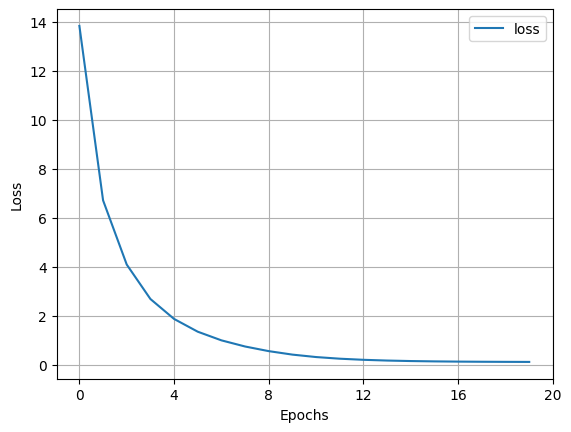

In [142]:
model = get_model(500, 1)
model.compile(optimizer='adam', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [143]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1014  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Id,SalePrice
0,1461,166620.625000
1,1462,222452.843750
2,1463,190939.359375
3,1464,167023.484375
4,1465,133846.140625
...,...,...
1454,2915,106008.546875
1455,2916,107801.382812
1456,2917,240746.921875
1457,2918,166789.500000


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 120.5427
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.3605
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1417
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5688
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3569
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8840
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8101
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9809
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3157
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7674
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3063
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9122
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5713
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2732
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0104
Epoch 16/20
37

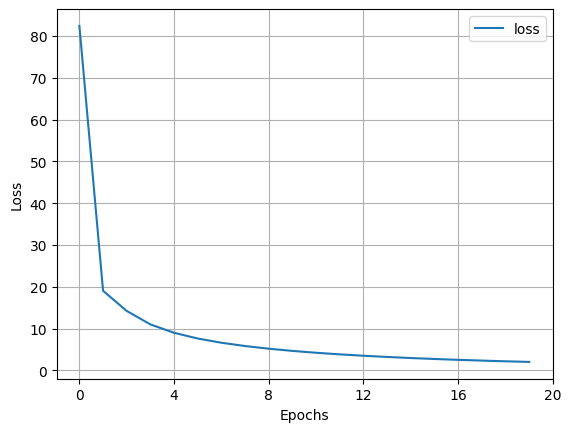

In [148]:
model = get_model(50, 1)
model.compile(optimizer='adam', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [149]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8716  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Id,SalePrice
0,1461,45304.976562
1,1462,64579.308594
2,1463,51047.121094
3,1464,45176.898438
4,1465,37181.574219
...,...,...
1454,2915,29403.402344
1455,2916,30028.884766
1456,2917,64627.003906
1457,2918,45826.980469


Как мы видим, с увеличением числа нейронов в слое, точность модели увеличивается, т.к. модель гораздо быстрее достигает меньших значений ошибки. Однако, главное не переусердствовать с этим, ведь если увеличить количество нейронов слишком сильно, то модель начнет переобучаться, что приведет к ухудшению результатов.

С уменьшением числа нейронов модель не успела достигнуть значения функции потерь, которого она достигала при 150 входных нейронов. К тому же, значения, полученные на тестовой выборке мало похожи на те, что дала модель с 500 и 150 входными нейронами.

Теперь попробуем изменить функцию активации входного слоя. Попробуем использовать `tanh` вместо `relu`.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 117.8461
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.8499
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.8840
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.0006
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.2006
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 81.9156
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.1226
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.5696
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.1894
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.9394
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.7970
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.7576
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.8045
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.9214
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.1002
Ep

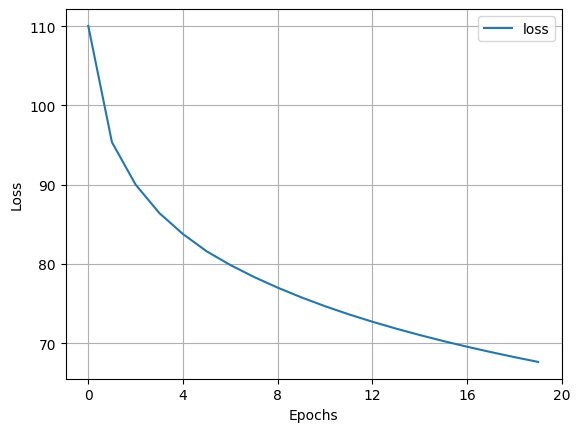

In [150]:
model = get_model(150, 1, activation='tanh')
model.compile(optimizer='adam', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [151]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.9415  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Id,SalePrice
0,1461,45.637474
1,1462,28.563536
2,1463,45.637474
3,1464,45.637474
4,1465,45.336609
...,...,...
1454,2915,37.612099
1455,2916,38.263153
1456,2917,44.156723
1457,2918,45.637474


Как мы видим, использование функции активации `tanh` вместо `relu` привело к ухудшению результатов. Это связано с тем, что `tanh` имеет большую производную, чем `relu`, что приводит к более медленной сходимости модели. Для таких моделей необходимо использовать более маленький learning rate или увеличить количество эпох.

Теперь попробуем изменить количество слоев нейронной сети. Добавим еще один слой с 150 нейронами. Активация, как и прежде, будет `relu`.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 61.4135
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3696
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1013
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9396
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9555
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5130
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3093
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2114
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1636
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1401
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1287
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1231
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1203
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1187
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1176
Epoch 16/20
37/37 

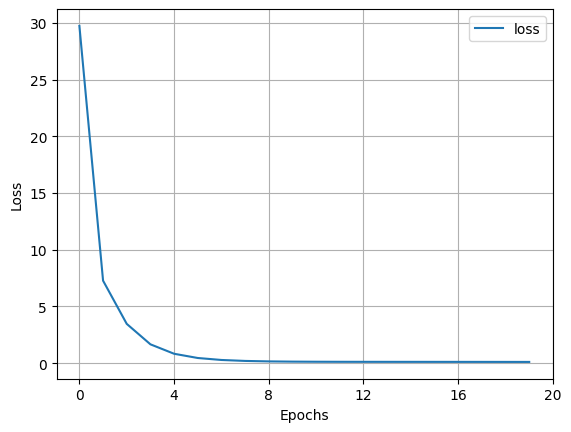

In [152]:
model = get_model(150, 1, hidden=150)
model.compile(optimizer='adam', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [153]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1029  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Id,SalePrice
0,1461,174827.484375
1,1462,225075.718750
2,1463,201946.828125
3,1464,173601.062500
4,1465,137647.781250
...,...,...
1454,2915,107251.164062
1455,2916,108735.125000
1456,2917,255513.171875
1457,2918,171662.218750


Наблюдается улучшение результатов при добавлении слоя. Однако, не стоит забывать, что добавление слоев увеличивает время обучения модели. Поэтому, если улучшение результатов незначительно, то лучше оставить модель с меньшим количеством слоев. В нашем случае набор данных небольшой, поэтому обучение происходит быстро.

Теперь изменим количество эпох обучения. Увеличим количество эпох с 20 до 100.

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32.6000
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5838
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5893
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7165
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9114
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7470
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9299
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3209
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8478  
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4693
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1594
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8907
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6446
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4231
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2311

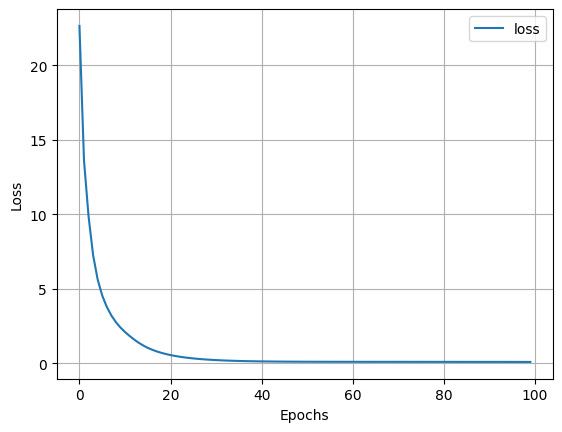

In [155]:
model = get_model(150, 1)
model.compile(optimizer='adam', loss='msle')
history = model.fit(X_train, y_train, epochs=100, batch_size=32)
render_loss_graph(history, 100)

In [156]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0918  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Id,SalePrice
0,1461,169888.156250
1,1462,212600.906250
2,1463,195758.843750
3,1464,176290.890625
4,1465,146683.062500
...,...,...
1454,2915,117324.507812
1455,2916,120421.945312
1456,2917,239176.890625
1457,2918,169207.703125


Модель показала хорошие результаты, но не стоит забывать, что увеличение количества эпох может привести к переобучению модели. К тому же иногда большое количество эпох может быть избыточным, т.к. модель может достигнуть оптимального для нас минимума функции потерь и на меньшем количестве эпох, что мы и наблюдаем выше. Кажется, в нашем случае для модели оптимально 50 эпох.

Попробуем изменить размер мини-выборки. Увеличим его с 32 до 128, а затем уменьшим до 4.

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 19.8455
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.2056
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.5337 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9147 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7521
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8195 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 6.0348
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.3747
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8232
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.3586
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9624
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6207 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 3.3229 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0612 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8294 

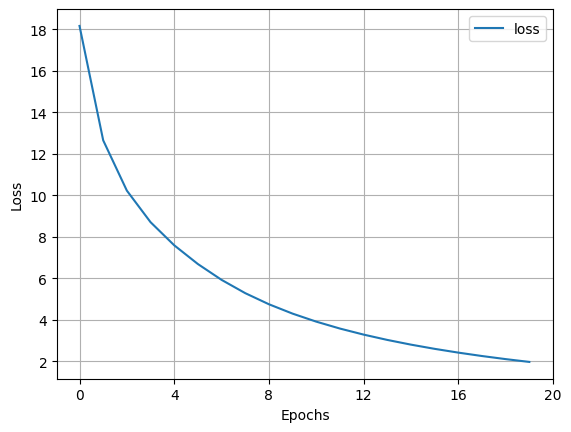

In [164]:
model = get_model(150, 1)
model.compile(optimizer='adam', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=128)
render_loss_graph(history)

In [160]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9580  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Id,SalePrice
0,1461,67866.546875
1,1462,90584.101562
2,1463,77365.156250
3,1464,67549.695312
4,1465,54245.949219
...,...,...
1454,2915,42935.121094
1455,2916,43670.574219
1456,2917,97496.562500
1457,2918,68052.757812


Epoch 1/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 31.8920
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7354
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1005
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5474
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3081
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1970
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1452
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1217
Epoch 9/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1116
Epoch 10/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1074
Epoch 11/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1054
Epoch 12/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1041
Epoch 13/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1029
Epoch 14/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1016
Epoch 15/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

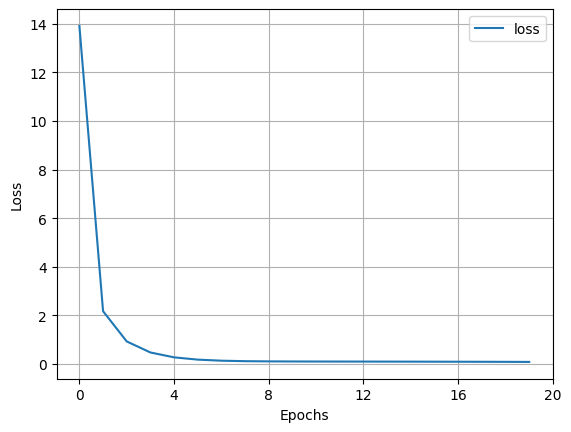

In [166]:
model = get_model(150, 1)
model.compile(optimizer='adam', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=4)
render_loss_graph(history)

In [167]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0860  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Id,SalePrice
0,1461,165765.875000
1,1462,190718.531250
2,1463,194208.531250
3,1464,176161.046875
4,1465,146974.859375
...,...,...
1454,2915,115262.812500
1455,2916,119452.398438
1456,2917,233936.812500
1457,2918,162531.953125


Любопытно, что при увеличении `batch_size`, модель стала обучаться быстрее, но результаты стали хуже. Это связано с тем, что веса обновляются редко и модель просто не успевает обучиться. При уменьшении `batch_size` модель обучается дольше, но результаты лучше. Всё же лучше использовать оптимальный размер мини-выборки для нашей модели, чтобы не достичь переобучения.

Перейдём к гиперпараметрам обучения.

## Изменение гиперпараметров обучения

Попробуем выбрать другие функции потерь и оптимизаторы. Начнём с функции потерь и протестируем `mean_squared_error` и `mean_absolute_error` вместо `mean_squared_logistic_error`.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 36895559680.0000
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32379099136.0000
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25913812992.0000
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18494429184.0000
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12298913792.0000
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8587977728.0000
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6895636992.0000
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6109047808.0000
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5619008512.0000
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5230497792.0000
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4892846080.0000
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4592005120.0000
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4323017216.0000
Epoch 14/20
37/37 ━━━━━━━━━━━

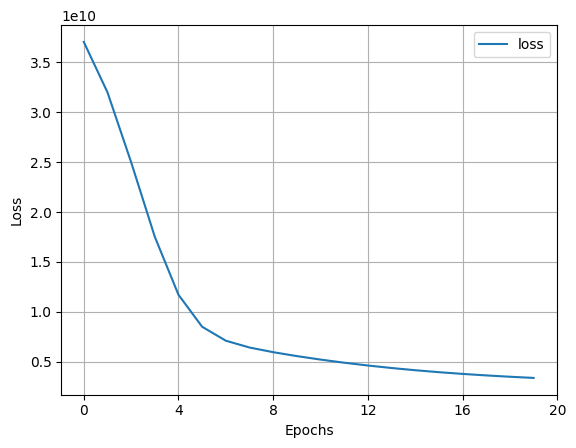

In [168]:
model = get_model(150, 1)
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [169]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3758152704.0000  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Id,SalePrice
0,1461,171194.984375
1,1462,174980.531250
2,1463,197762.250000
3,1464,191676.062500
4,1465,176114.031250
...,...,...
1454,2915,148148.000000
1455,2916,152454.765625
1456,2917,222044.046875
1457,2918,173294.375000


График показывает, что использование `MSE` даёт хорошие результаты. Стоит заметить, что значения функции потерь очень большие в сравнении с `MSLE`, но это не страшно, т.к. это не влияет на результаты. Предсказанные значения близки к тем, что мы получали ранее.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 177601.1875
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 165748.0625
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146197.3281
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118118.4453
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82362.6484
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53344.4453
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47754.0234
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47014.2461
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46192.8281
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45302.3359
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44349.9297
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43297.1758
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42193.3203
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41058.0547
Epoch 15/20
37/37 ━━━━━━━

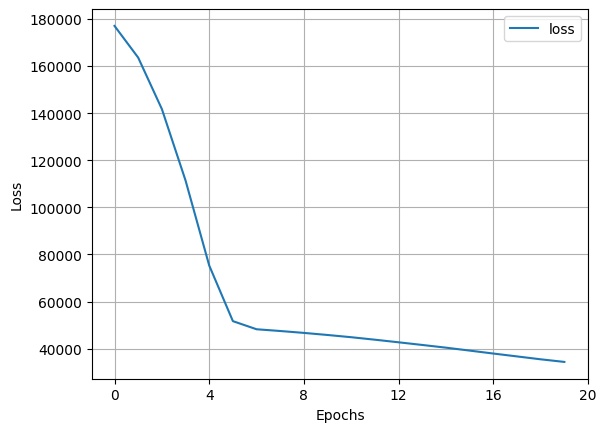

In [170]:
model = get_model(150, 1)
model.compile(optimizer='adam', loss='mae')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [171]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37013.9062  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Id,SalePrice
0,1461,151365.468750
1,1462,178796.421875
2,1463,186363.187500
3,1464,183933.312500
4,1465,167103.359375
...,...,...
1454,2915,131278.796875
1455,2916,137830.937500
1456,2917,196478.406250
1457,2918,146393.390625


При использовании `MAE` можно видеть на графике функции потерь выраженную яму на 5-6 эпохе. Это говорит о том, что, скорее всего, не стоит выбирать количество эпох сильно больше 5-6 и модели вполне достаточно будет, к примеру, 8-10 эпох. Предсказанные значения так же довольно близки к нашим предыдущим предсказания.

Теперь перейдём к изменению оптимизатора. Вместо `adam` протестируем `rmsprop` и `sgd`. Функцию потерь, как раньше, будем использовать `msle`. А вот количество входных нейронов уменьшим до 50, чтобы сделать результаты ещё более показательными.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 44.8708
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4467
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9784 
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7516
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6792
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2995
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3275
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6249
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1153
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7483
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4892
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3132
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2016
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1401
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1150
Epoch 16/20
37/3

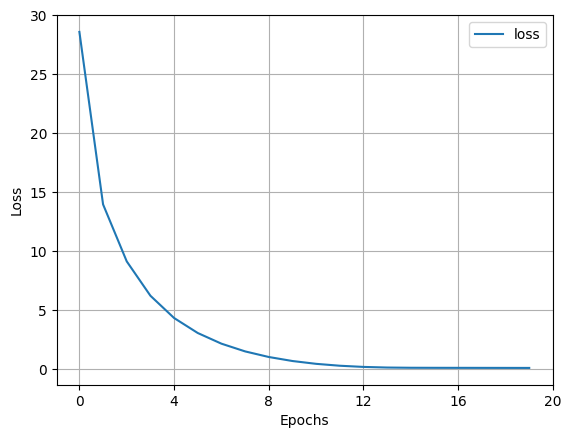

In [180]:
model = get_model(50, 1)
model.compile(optimizer='rmsprop', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [181]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0953  
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Id,SalePrice
0,1461,171776.984375
1,1462,224709.562500
2,1463,197931.062500
3,1464,176011.687500
4,1465,145388.593750
...,...,...
1454,2915,117018.742188
1455,2916,119832.445312
1456,2917,243486.406250
1457,2918,172167.609375


Любопытно, что при использовании `rmsprop` модель сходится быстро даже при 50 входных нейронах.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3555  
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7272
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0698
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7566
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5781
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4660
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3912
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3392
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3018
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2744
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2538
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2382
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2262
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2168
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2095
Epoch 16/20
37/37

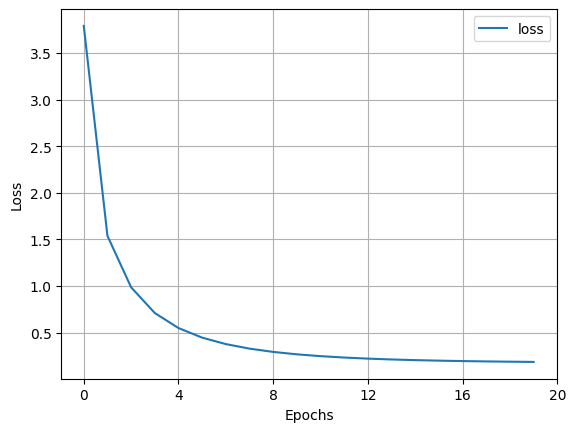

In [182]:
model = get_model(50, 1)
model.compile(optimizer='sgd', loss='msle')
history = model.fit(X_train, y_train, epochs=20, batch_size=32)
render_loss_graph(history)

In [184]:
scores = model.evaluate(X_val, y_val)
preds = model.predict(test_edited)
pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.squeeze(preds)})

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1721 
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Id,SalePrice
0,1461,179366.156250
1,1462,220138.640625
2,1463,209388.687500
3,1464,161050.890625
4,1465,99437.273438
...,...,...
1454,2915,58127.660156
1455,2916,58042.703125
1456,2917,287743.312500
1457,2918,165978.265625


Здесь же с `sgd` ситуация немного отличается — при таком оптимизаторе функция потерь более линейна, а значит необходимо более точно настраивать гиперпараметры обучения, чтобы получить хорошую сходимость модели с таким оптимизатором при малом числе входных нейронов.